## 1. Pre-requisites

In [1]:
# install.packages("plotrix")
# install.packages("mice")
# install.packages("VIM")
# install.packages("lattice") 
# install.packages("tidyr")

set.seed(5)
library(plotrix)
library(mice)
library(VIM)
library(lattice)
library(tidyr)
library(dplyr)

Warning message:
"package 'plotrix' was built under R version 3.6.3"Warning message:
"package 'mice' was built under R version 3.6.3"
Attaching package: 'mice'

The following object is masked from 'package:stats':

    filter

The following objects are masked from 'package:base':

    cbind, rbind

Warning message:
"package 'VIM' was built under R version 3.6.3"Loading required package: colorspace
Loading required package: grid
Loading required package: data.table
VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: 'VIM'

The following object is masked from 'package:datasets':

    sleep

Warning message:
"package 'lattice' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
A

In [2]:
setwd("D://R-4.0.2//ExcelWorks")
df1 <- read.csv(file = "UNS1.csv", header = F, stringsAsFactors=FALSE)
df2 <- read.csv(file = "UNS2.csv", header = F, stringsAsFactors=FALSE)
df3 <- read.csv(file = "UNS3.csv", header = F, stringsAsFactors=FALSE)
df4 <- read.csv(file = "UNS4.csv", header = F, stringsAsFactors=FALSE)

In [3]:
df<- base::rbind(df1,df2,df3,df4)

In [4]:
colnames(df) <- c('source_ip', 'source_port', 'dest_ip', 'dest_port', 'proto', 'state', 'duration', 'source_bytes', 'dest_bytes', 'source_ttl',
'dest_ttl', 'source_loss', 'dest_loss', 'service', 'source_load', 'dest_load', 'source_pkts', 'dest_pkts', 'source_TP_win', 'dest_TP_win', 
'source_tcp_bn', 'dest_tcp_bn', 'source_mean_sz', 'dest_mean_sz', 'trans_depth', 'res_bdy_len', 'source_jitter', 'dest_jitter', 'start_time',
'last_time', 'source_int_pk_time', 'dest_int_pk_time', 'tcp_rtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'count_state_ttl', 
'count_flw_http_mthd', 'is_ftp_login', 'count_ftp_cmd', 'count_srv_source', 'count_srv_dest', 'count_dest_ltm',
'count_source_ltm', 'count_source_destport_ltm', 'count_dest_sourceport_ltm', 'counts_dest_source_ltm', 'attack_cat', 'Label')
head(df)


source_ip,source_port,dest_ip,dest_port,proto,state,duration,source_bytes,dest_bytes,source_ttl,...,count_ftp_cmd,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,attack_cat,Label
ï»¿59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,,0
59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,,0
59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,,0
59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,,0
59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,,0
59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,2,4,2,3,1,1,2,,0


In [5]:
table(df$attack_cat) # This exhibits a couple of problems, most notable
		     # the NULL ones


                          Fuzzers         Fuzzers   Reconnaissance  
         2218764             5051            19195            12228 
      Shellcode          Analysis         Backdoor        Backdoors 
            1288             2677             1795              534 
             DoS         Exploits          Generic   Reconnaissance 
           16353            44525           215481             1759 
       Shellcode            Worms 
             223              174 

In [6]:
t <- table(df$attack_cat, exclude = "")
t[1] <- t[1] + t[2]
t[2]
t <- t[-1]
t[6] <- t[5] + t[6]
t[6]
t<- t[-5]
t

Fuzzers  
    19195

Backdoors 
     2329


        Fuzzers   Reconnaissance        Shellcode          Analysis 
           19195            12228             1288             2677 
       Backdoors              DoS         Exploits          Generic 
            2329            16353            44525           215481 
  Reconnaissance        Shellcode            Worms 
            1759              223              174 

In [7]:
t[3]<- t[3]+ t[10]
t[3]
t <- t[-10]
t[2]<- t[2]+t[9]
t[2]
t<- t[-9]
t

Shellcode  
       1511

Reconnaissance  
           13987


        Fuzzers   Reconnaissance        Shellcode          Analysis 
           19195            13987             1511             2677 
       Backdoors              DoS         Exploits          Generic 
            2329            16353            44525           215481 
           Worms 
             174 

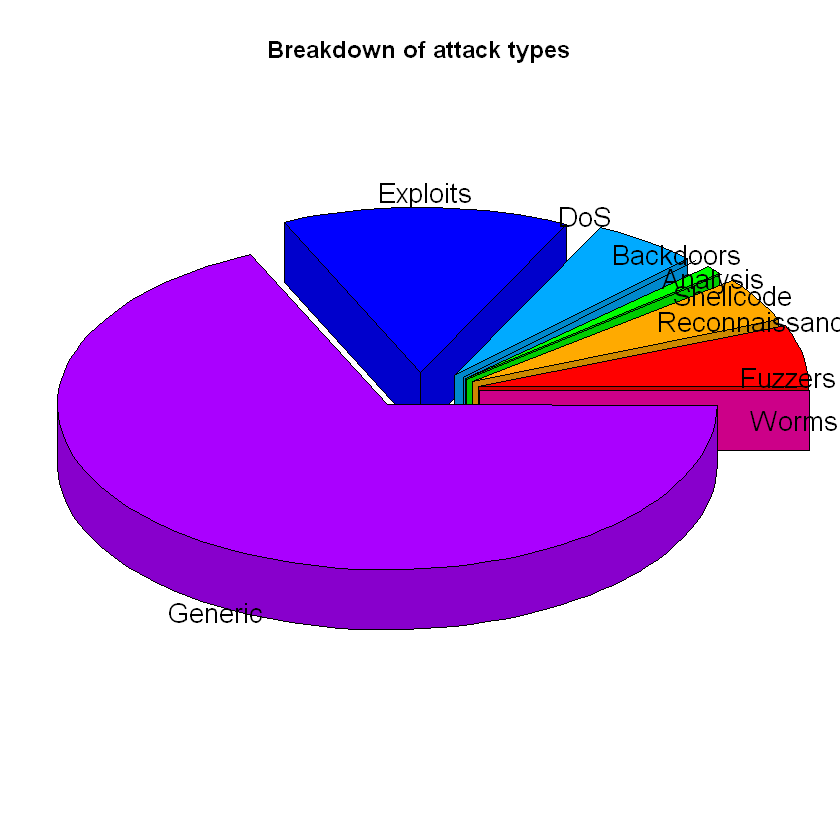

In [8]:
pie3D(t, labels = names(t), explode = 0.2, theta = pi/4,
labelcex= 1.35, radius = 1.1, main = "Breakdown of attack types")

## 2.1 Data cleaning and dealing with missingness

In [9]:
## First row has been corrupted by our binding for some reason:
df<- df[-1,]

In [10]:
table(df$source_ip)


    10.40.170.2     10.40.182.1     10.40.182.3     10.40.182.6      10.40.85.1 
           2094            3984            2105            3492            4018 
    10.40.85.10     10.40.85.30       127.0.0.1   149.171.126.0   149.171.126.1 
            793            2138               1             261             311 
 149.171.126.10  149.171.126.11  149.171.126.12  149.171.126.13  149.171.126.14 
          30365              28           16082             218           41047 
 149.171.126.15  149.171.126.16  149.171.126.17  149.171.126.18  149.171.126.19 
          44883               9              22           81680              21 
  149.171.126.2   149.171.126.3   149.171.126.4   149.171.126.5   149.171.126.6 
            295             311             300             339             298 
  149.171.126.7   149.171.126.8   149.171.126.9    175.45.176.0    175.45.176.1 
            270             291             285           82999          127998 
   175.45.176.2    175.45.1

In [11]:
# What's the unique IP case?
print(df[df$source_ip=="127.0.0.1",])

       source_ip source_port   dest_ip dest_port proto state duration
500014 127.0.0.1       52129 127.0.0.1        25   tcp   RST  1.1e-05
       source_bytes dest_bytes source_ttl dest_ttl source_loss dest_loss
500014           60         40         64       64           0         0
       service source_load dest_load source_pkts dest_pkts source_TP_win
500014       -           0         0           1         1           255
       dest_TP_win source_tcp_bn dest_tcp_bn source_mean_sz dest_mean_sz
500014           0    2627775599           0             60           40
       trans_depth res_bdy_len source_jitter dest_jitter start_time  last_time
500014           0           0             0           0 1421946164 1421946164
       source_int_pk_time dest_int_pk_time tcp_rtt synack ackdat
500014                  0                0       0      0      0
       is_sm_ips_ports count_state_ttl count_flw_http_mthd is_ftp_login
500014               0               0                   0    

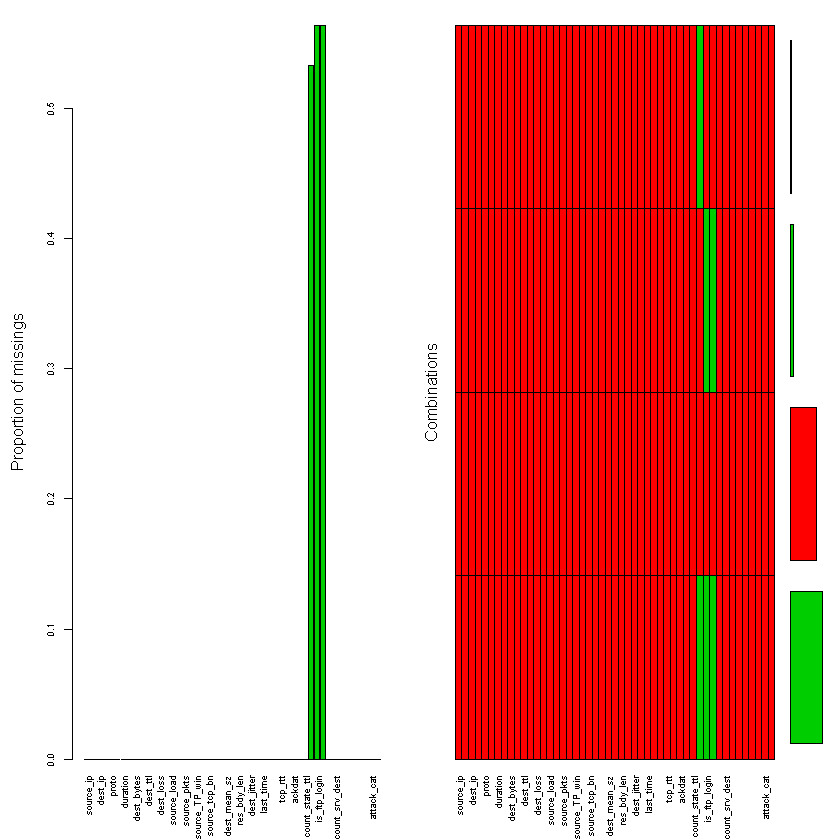

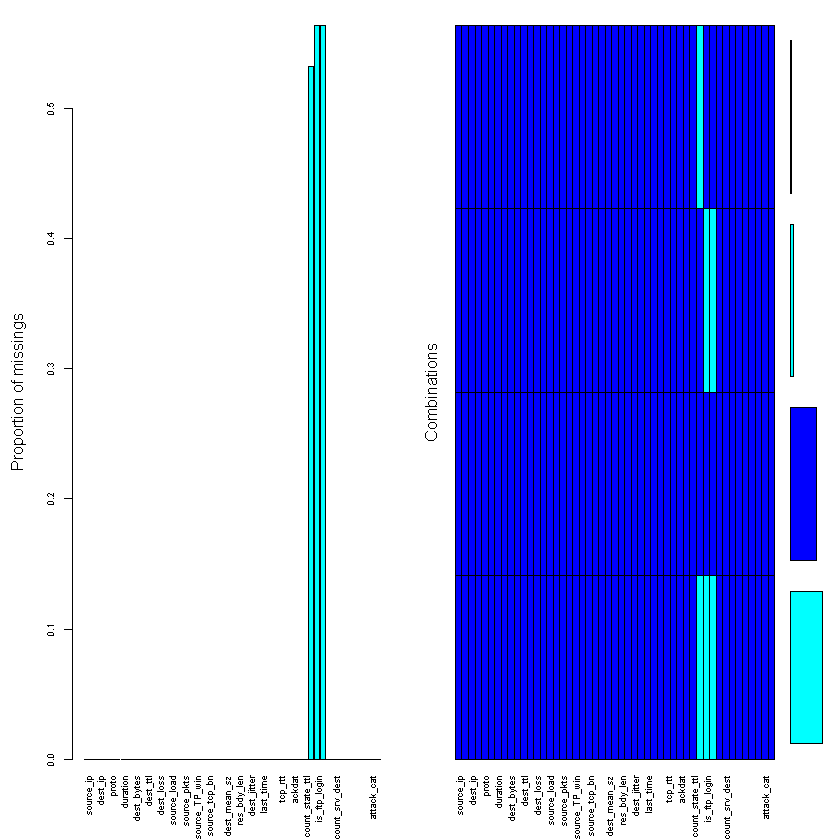

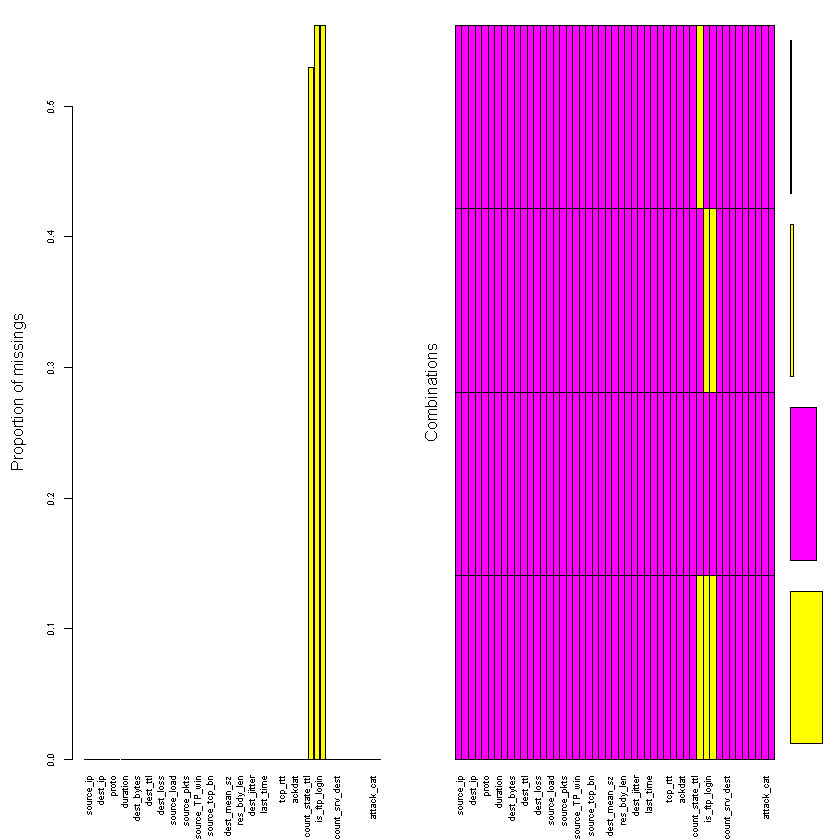

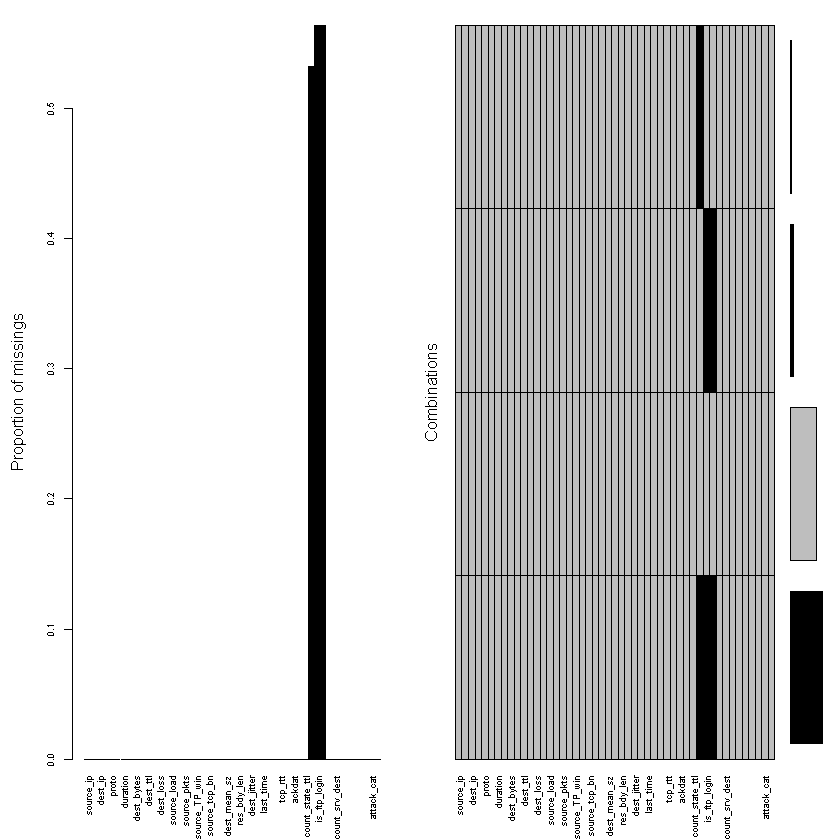

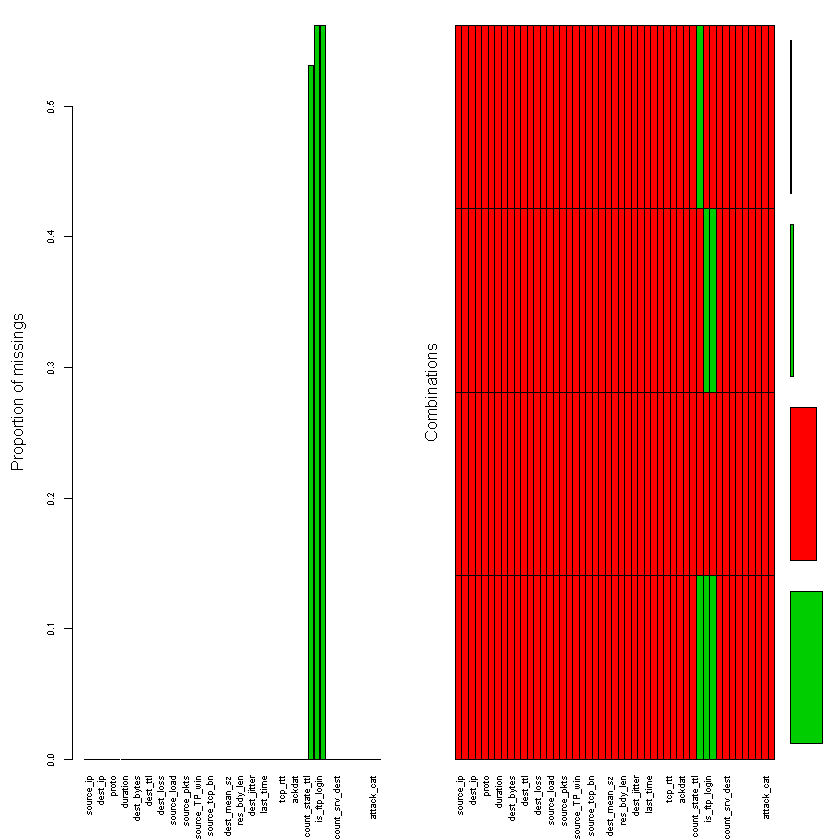

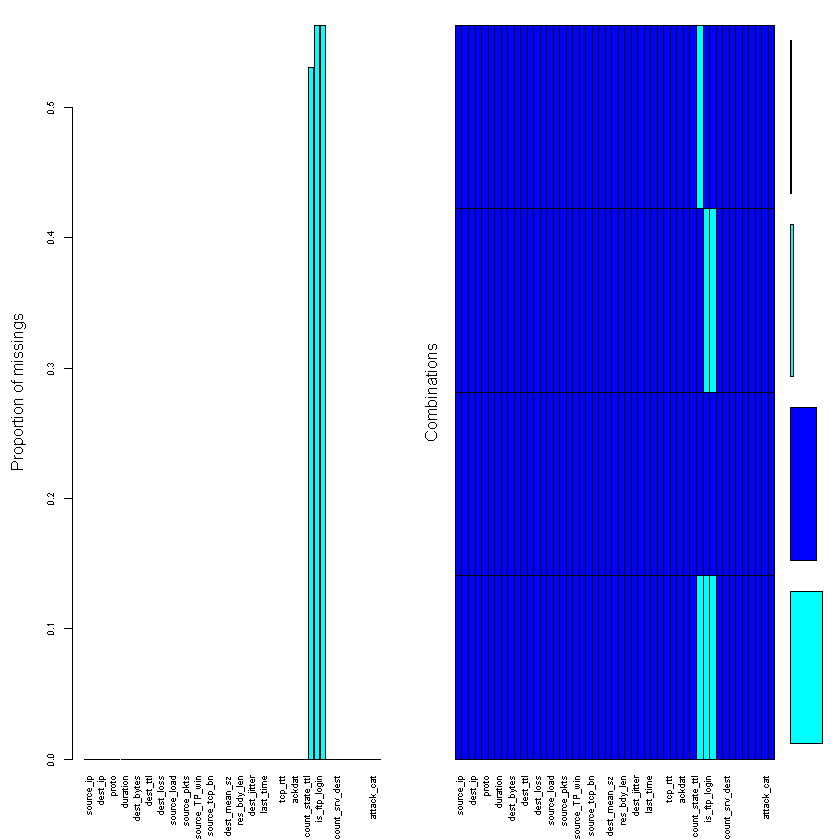

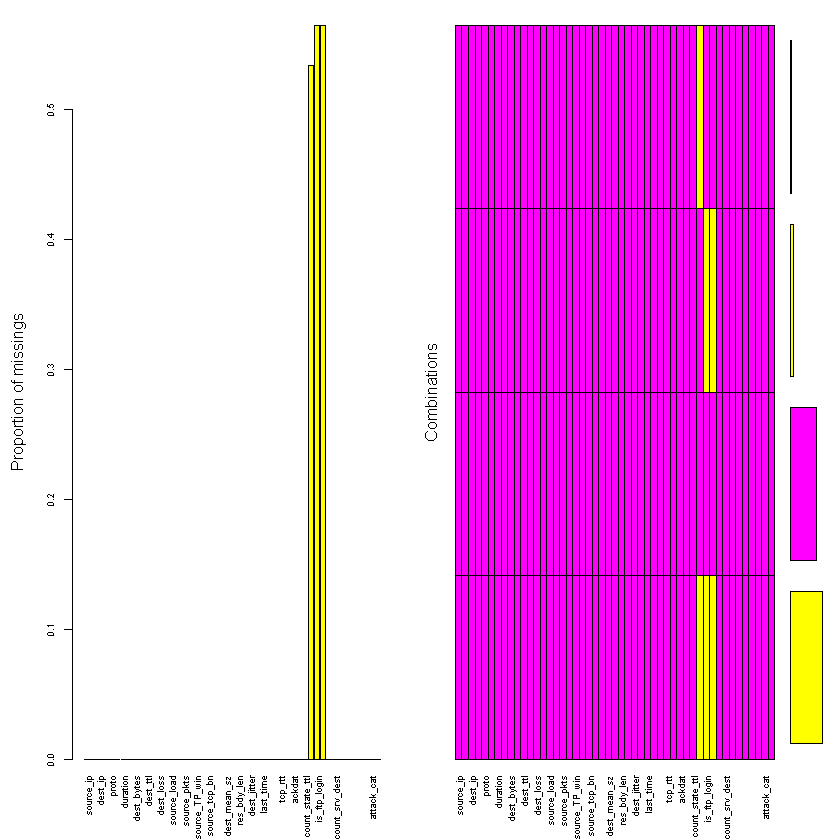

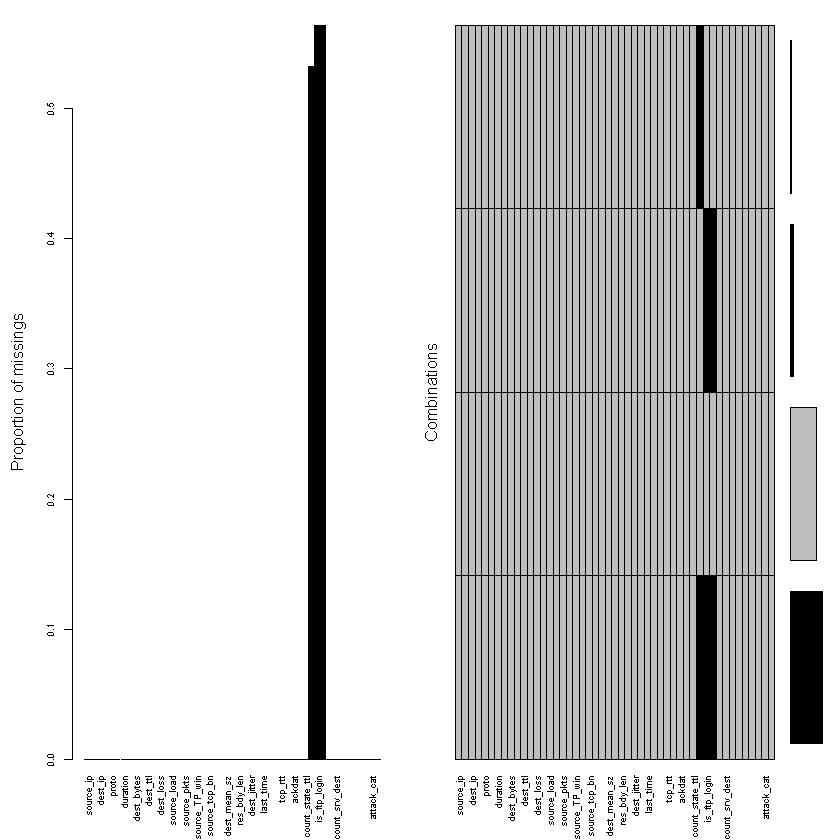

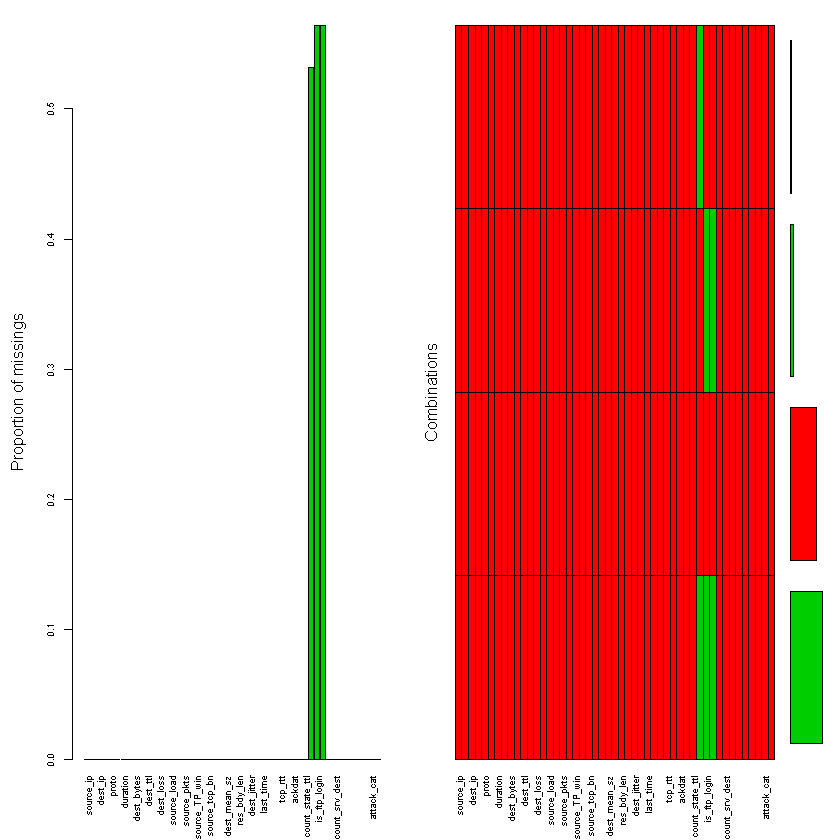

In [12]:
op <- par(mfrow = c(3,3))
for(i in 1:9) {
	set.seed(i)
	some <- sample(1:nrow(df), round(nrow(df)*0.05))
	df_t <- df[some, ]
	aggr(df_t, col = c(2*i,2*i+1))
	}
par(op)

In [13]:
## Lots of the missingness is spread across 3 main features
table(df$is_ftp_login)
identical(sum(table(df$is_ftp_login)), nrow(df)) # Should be TRUE, but it is FALSE
	## More than half of the data is missing in that 
    ## This missingness does NOT count towards the total amount of datapoints => 'spooky' missingness


      0       1       2       4 
1066592   43389      30     156 

[1] FALSE

In [14]:
## Let's check the same result for the whole feature space
## Check if all missingness in the data is 'spooky'
idt <- vector(len = ncol(df))
for(i in 1:ncol(df)) {
	idt[i]<- identical(sum(table(df[,i])), nrow(df))
		}
idt

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[37]  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[49]  TRUE

In [15]:
p<- paste("The number of anomalous features is", ncol(df)-sum(idt), sep=" ")
print(p)

[1] "The number of anomalous features is 3"


In [16]:
## Using the missingness visualisation, we deduce a strong correlation between the
## missingness of the three features, and can also identify them as:

df_miss <- cbind(df$is_ftp_login, df$count_ftp_cmd, df$count_flw_http_mthd)
colnames(df_miss) <- c("login", "cmd", "http")
df_miss <- as.data.frame(df_miss)
head(df_miss, 20) # Still too large to work with, easy trick:
table(df_miss$login)
table(df_miss$cmd)
table(df_miss$http)

login,cmd,http
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0



      0       1       2       4 
1066592   43389      30     156 


      0       1       2       3       4       5       6       8 
1066497   40077    1264     729     960     290     332      18 


     0      1      2      3      4      5      6      8      9     10     12 
986790 188008    588    738   6564    430   7902     56    270     30    132 
    14     16     25     30     36 
   224     48     25     60     36 

In [17]:
df_miss_2 <- df_miss[df_miss$login!=0 & df_miss$login!=1, ]
dim(df_miss_2) # Checks out
head(df_miss_2, 15)
    ## We found the root of the problem. Weirdly enough, the lines themselves are listed across as
	## NA.1, NA.2 etc. - which is why table() failed to pick them up.


[1] 1430065       3

,login,cmd,http
NA,NA,NA,NA
NA.1,NA,NA,NA
NA.2,NA,NA,NA
NA.3,NA,NA,NA
NA.4,NA,NA,NA
NA.5,NA,NA,NA
NA.6,NA,NA,NA
NA.7,NA,NA,NA
NA.8,NA,NA,NA
NA.9,NA,NA,NA


In [18]:
l1 <- median(df_miss$login, na.rm = TRUE)
l2 <- median(df_miss$cmd, na.rm = TRUE)
l3 <- median(df_miss$http, na.rm = TRUE)
c(l1,l2,l3) # All 0

[1] 0 0 0

In [19]:
###### FAILED REPLACEMENT ATTEMPT
r1<- replace_na(data = df_miss$login, replace = l1)
r2<- replace_na(data = df_miss$cmd, replace = l2)
r3<- replace_na(data = df_miss$http, replace = l3)

l<- 3*nrow(df_miss) - (sum(table(df_miss$login))+sum(table(df_miss$cmd))+sum(table(df_miss$http)))
ll<- as.list(rep(0, times = l))
dd <- replace_na(data = df_miss, replace = ll)
###### END OF FAILED REPLACEMENT ATTEMPT

In [20]:
table(dd$login)
    ## NAs aren't picked up properly (?)


      0       1       2       4 
1066592   43389      30     156 

In [22]:
## GOOD attempt [With solution 1]
df$is_ftp_login[is.na(df$is_ftp_login)] <- l1
df$count_ftp_cmd[is.na(df$count_ftp_cmd)] <- l2
df$count_flw_http_mthd[is.na(df$count_flw_http_mthd)] <- l3

In [27]:
## GOOD attempt [With solution 2]
# df$[is.na(df$is_ftp_login),] <- l1
# df$[is.na(df$count_ftp_cmd),] <- l2
# df$[is.na(df$count_flw_http_mthd),] <- l3

In [23]:
## Let's check if it worked
for(i in 1:ncol(df)) {
	idt[i]<- identical(sum(table(df[,i])), nrow(df))
		}
p<- paste("The number of anomalous features is", ncol(df)-sum(idt), sep=" ")
print(p)

[1] "The number of anomalous features is 0"


In [25]:
table(df$is_ftp_login)
    ## We somehow got rid of the '2' and '4' as well in the process USING SOLUTION 2
    ## We DO NOT get rid of them USING SOLUTION 1


      0       1       2       4 
2496471   43389      30     156 

In [26]:
table(df$source_ip)


    10.40.170.2     10.40.182.1     10.40.182.3     10.40.182.6      10.40.85.1 
           2094            3984            2105            3492            4018 
    10.40.85.10     10.40.85.30       127.0.0.1   149.171.126.0   149.171.126.1 
            793            2138               1             261             311 
 149.171.126.10  149.171.126.11  149.171.126.12  149.171.126.13  149.171.126.14 
          30365              28           16082             218           41047 
 149.171.126.15  149.171.126.16  149.171.126.17  149.171.126.18  149.171.126.19 
          44883               9              22           81680              21 
  149.171.126.2   149.171.126.3   149.171.126.4   149.171.126.5   149.171.126.6 
            295             311             300             339             298 
  149.171.126.7   149.171.126.8   149.171.126.9    175.45.176.0    175.45.176.1 
            270             291             285           82999          127998 
   175.45.176.2    175.45.1

In [28]:
g1 <- grepl(pattern = "59.166", x= df$source_ip)
s1<- sum(table(df$source_ip[g1]))
s2<- sum(table(df$source_ip[df$source_ip!=0]))-s1
g2 <- grepl(pattern = "149.171", x= df$dest_ip)
s3<- sum(table(df$dest_ip[g2]))
s4<- sum(table(df$dest_ip[df$dest_ip!=0]))-s3

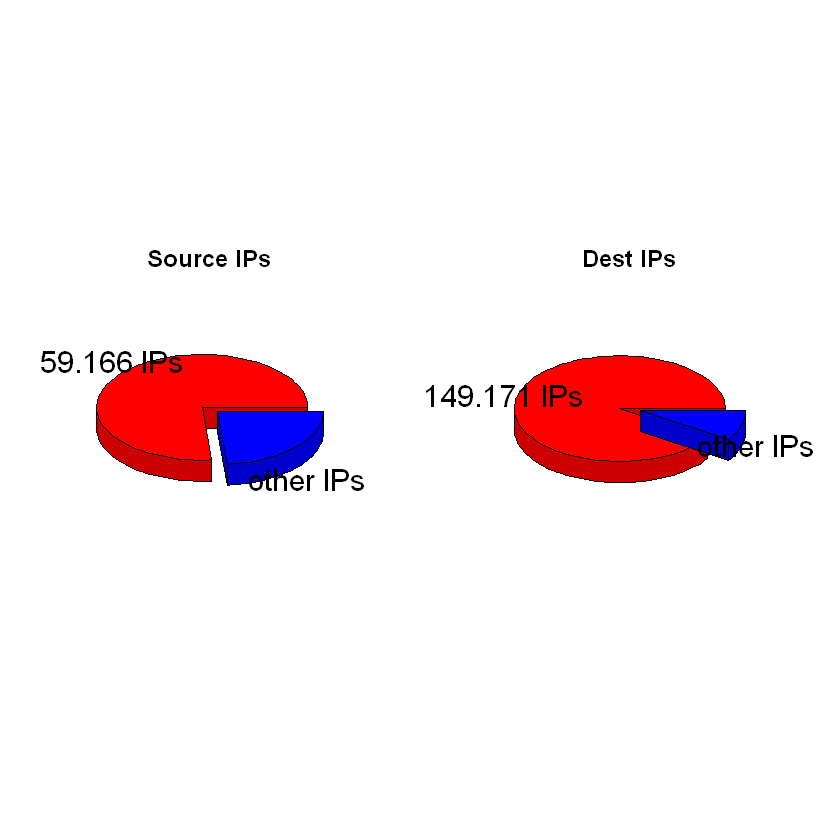

In [29]:
op <- par(mfrow=c(1,2))
pie3D(c(s1,s2), col=c("red","blue"), labels = c("59.166 IPs", "other IPs"), main = "Source IPs", explode = 0.1, theta = pi/4)
pie3D(c(s3,s4), col=c("red","blue"), labels = c("149.171 IPs", "other IPs"), main = "Dest IPs", explode = 0.1, theta = pi/4)
par(op)

## 2.2 Facultative data cleaning

In [57]:
                          ## Carry on with this section ONLY IF you have zeroes in any of the following tables
head(table(df$source_ip)) ## If you see any zeroes in here, you most likely used method 2 for cleaning
head(table(df$dest_ip))
head(table(df$proto))


10.40.170.2 10.40.182.1 10.40.182.3 10.40.182.6  10.40.85.1 10.40.85.10 
       2094        3984        2105        3492        4018         793 


  10.40.170.2 10.40.182.255   10.40.182.3   10.40.182.6  10.40.198.10 
         2094          3480          3824            11           265 
   10.40.85.1 
         2407 


      3pc       a/n aes-sp3-d       any     argus      aris 
      137       137       137       411       137       137 

In [30]:
tt1 <- table(df$source_ip[g1])
probs1 <- vector(len = 10)
for(i in 1:10) {
    probs1[i] <- as.numeric(tt1[i]/s1)
}

tt2 <- table(df$dest_ip[g2])
probs2 <- vector(len = 20)
for(i in 1:20) {
    probs2[i] <- as.numeric(tt2[i]/s3)
}

sum(probs1)
sum(probs2)    # Should be 1, check

[1] 1

[1] 1

In [31]:
set.seed(5)
repl1 <- sample(c(paste0("59.166.0.", c(0:9))), size= 1452844, replace = TRUE, prob=probs1)
head(repl1)
length(repl1)

[1] "59.166.0.1" "59.166.0.9" "59.166.0.7" "59.166.0.5" "59.166.0.1"
[6] "59.166.0.9"

[1] 1452844

In [32]:
set.seed(5)
repl2 <- sample(c(paste0("149.171.126.", c(0:19))), size= 1452844, replace = TRUE, prob=probs2)
head(repl2)
length(repl2)

[1] "149.171.126.14" "149.171.126.16" "149.171.126.6"  "149.171.126.1" 
[5] "149.171.126.12" "149.171.126.16"

[1] 1452844

In [33]:
# df$source_ip[df$source_ip == '0'] <- NA
# df$source_ip[is.na(df$source_ip)] <- repl1
identical(sum(table(df$source_ip)), nrow(df))

# df$dest_ip[df$dest_ip == '0'] <- NA
# df$dest_ip[is.na(df$dest_ip)] <- repl2
identical(sum(table(df$dest_ip)), nrow(df))

[1] TRUE

[1] TRUE

In [34]:
probs3 <- vector(len = 3)
ss <- 772181 + 301601 + 6556  # tcp + udp + arp
probs3[1]=772181/ss
probs3[2]=301601/ss
probs3[3]=6556/ss

sum(probs3)

[1] 1

In [35]:
set.seed(5)
repl3 <- sample(c("tcp", "udp", "arp"), size = 1452844 , replace = TRUE, prob = probs3)
head(repl3)
length(repl3)

[1] "tcp" "tcp" "udp" "tcp" "tcp" "tcp"

[1] 1452844

In [36]:
# df$proto[df$proto == '0'] <- NA
# df$proto[is.na(df$proto)] <- repl3
identical(sum(table(df$proto)), nrow(df))
        ## We've replaced the crucial ones, all others are very likely to be picked up by the NN since they're mostly unimportant for the analysis

[1] TRUE

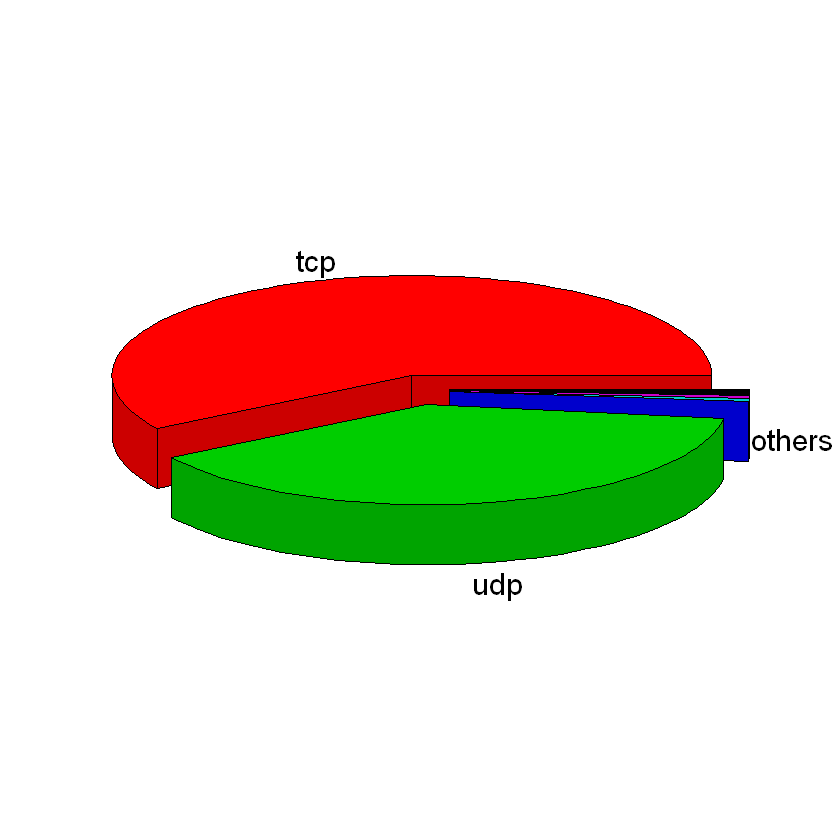

In [37]:
tab <- table(df$proto)
tab <- tab[order(tab, decreasing = TRUE)]

pie3D(tab, labels=c("tcp", "udp", "others"), col = c(2:length(tab)), explode = 0.1)

## 3. 5-fold CV

In [46]:
set.seed(5)
dft <- sample(1:nrow(df), size = nrow(df)*0.8, replace = FALSE)
df_train <- df[dft,]
df_test <- df[-dft,]

head(df_train,3)
dim(df_train)
head(df_test, 3)
dim(df_test)

,source_ip,source_port,dest_ip,dest_port,proto,state,duration,source_bytes,dest_bytes,source_ttl,...,count_ftp_cmd,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,attack_cat,Label
110444,59.166.0.0,4248,149.171.126.9,56378,udp,CON,0.002432,536,304,31,...,0,9,4,6,8,1,1,5,,0
701306,10.40.182.1,0,10.40.182.3,0,arp,CON,43.460464,84,138,0,...,0,2,2,2,2,2,2,2,,0
1907784,59.166.0.7,50980,149.171.126.0,80,tcp,FIN,1.506006,1684,10168,31,...,0,3,1,1,3,2,1,1,,0


[1] 2032036      49

,source_ip,source_port,dest_ip,dest_port,proto,state,duration,source_bytes,dest_bytes,source_ttl,...,count_ftp_cmd,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,attack_cat,Label
2,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,,0
4,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,,0
7,59.166.0.6,2142,149.171.126.4,53,udp,CON,0.001134,132,164,31,...,0,12,7,1,2,2,1,1,,0


[1] 508010     49

In [53]:
df_train_1 <- df_train[1:(nrow(df_train)/2),]
df_train_2 <- df_train[-(1:nrow(df_train_1)), ]

head(df_train_1, 3)
dim(df_train_1)
head(df_train_2, 3)
dim(df_train_2)

,source_ip,source_port,dest_ip,dest_port,proto,state,duration,source_bytes,dest_bytes,source_ttl,...,count_ftp_cmd,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,attack_cat,Label
110444,59.166.0.0,4248,149.171.126.9,56378,udp,CON,0.002432,536,304,31,...,0,9,4,6,8,1,1,5,,0
701306,10.40.182.1,0,10.40.182.3,0,arp,CON,43.460464,84,138,0,...,0,2,2,2,2,2,2,2,,0
1907784,59.166.0.7,50980,149.171.126.0,80,tcp,FIN,1.506006,1684,10168,31,...,0,3,1,1,3,2,1,1,,0


[1] 1016018      49

,source_ip,source_port,dest_ip,dest_port,proto,state,duration,source_bytes,dest_bytes,source_ttl,...,count_ftp_cmd,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,attack_cat,Label
1159485,59.166.0.0,9834,149.171.126.8,8427,tcp,FIN,0.932498,5008,3080,31,...,0,7,7,4,2,1,1,3,,0
1709332,175.45.176.1,1043,149.171.126.18,53,udp,INT,0.000005,114,0,254,...,0,44,44,34,34,34,19,44,Generic,1
2434371,175.45.176.0,1043,149.171.126.10,53,udp,INT,0.000003,114,0,254,...,0,15,15,15,15,15,15,15,Generic,1


[1] 1016018      49

In [56]:
    ## The training set overall is too large to upload in a single go on Git
    ## Split into 2 equal files: Can be merged together consecutively to reconstruct the whole 'df_train' with ease

# write.csv(df_train, file = "Utrain.csv")
# write.csv(df_train_1, file="Utrain1.csv")
# write.csv(df_train_2, file="Utrain2.csv")
# write.csv(df_test, file="Utest.csv")

**Alternative reading of the training/testing split once you downloaded them**

In [3]:
setwd("D://R-4.0.2//ExcelWorks")
dff_train <- read.csv(file = "Utrain.csv", header=T)
dff_test <- read.csv(file = "Utest.csv", header = T)

head(dff_train)
dim(dff_train)

X,source_ip,source_port,dest_ip,dest_port,proto,state,duration,source_bytes,dest_bytes,...,count_ftp_cmd,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,attack_cat,Label
110444,59.166.0.0,4248,149.171.126.9,56378,udp,CON,0.002432,536,304,...,0,9,4,6,8,1,1,5,,0
701306,10.40.182.1,0,10.40.182.3,0,arp,CON,43.460464,84,138,...,0,2,2,2,2,2,2,2,,0
1907784,59.166.0.7,50980,149.171.126.0,80,tcp,FIN,1.506006,1684,10168,...,0,3,1,1,3,2,1,1,,0
167719,59.166.0.3,11660,149.171.126.4,10328,tcp,FIN,0.035045,2542,21006,...,0,7,7,4,3,1,1,1,,0
1038235,59.166.0.3,42071,149.171.126.3,6881,tcp,FIN,0.013793,1540,1644,...,0,13,11,9,10,4,1,7,,0
2406529,175.45.176.0,47439,149.171.126.10,53,udp,INT,0.000001,114,0,...,0,29,29,17,16,16,16,29,Generic,1


[1] 2032036      50

In [4]:
head(dff_test)
dim(dff_test)

X,source_ip,source_port,dest_ip,dest_port,proto,state,duration,source_bytes,dest_bytes,...,count_ftp_cmd,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,attack_cat,Label
2,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,...,0,2,4,2,3,1,1,2,,0
4,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,...,0,6,9,1,1,1,1,1,,0
7,59.166.0.6,2142,149.171.126.4,53,udp,CON,0.001134,132,164,...,0,12,7,1,2,2,1,1,,0
10,59.166.0.7,12660,149.171.126.4,53,udp,CON,0.001167,132,164,...,0,6,7,2,1,1,1,1,,0
16,59.166.0.1,10393,149.171.126.6,44307,udp,CON,0.001749,528,304,...,0,8,2,3,5,1,1,2,,0
19,59.166.0.1,8989,149.171.126.6,111,udp,CON,0.004898,568,312,...,0,8,2,3,5,2,1,2,,0


[1] 508010     50

In [5]:
dff_train <- dff_train[,-1]
dff_test <- dff_test[,-1]

In [6]:
head(table(dff_train$source_ip))
head(table(dff_test$source_ip))


10.40.170.2 10.40.182.1 10.40.182.3 10.40.182.6  10.40.85.1 10.40.85.10 
       1685        3162        1689        2764        3188         639 


10.40.170.2 10.40.182.1 10.40.182.3 10.40.182.6  10.40.85.1 10.40.85.10 
        409         822         416         728         830         154 

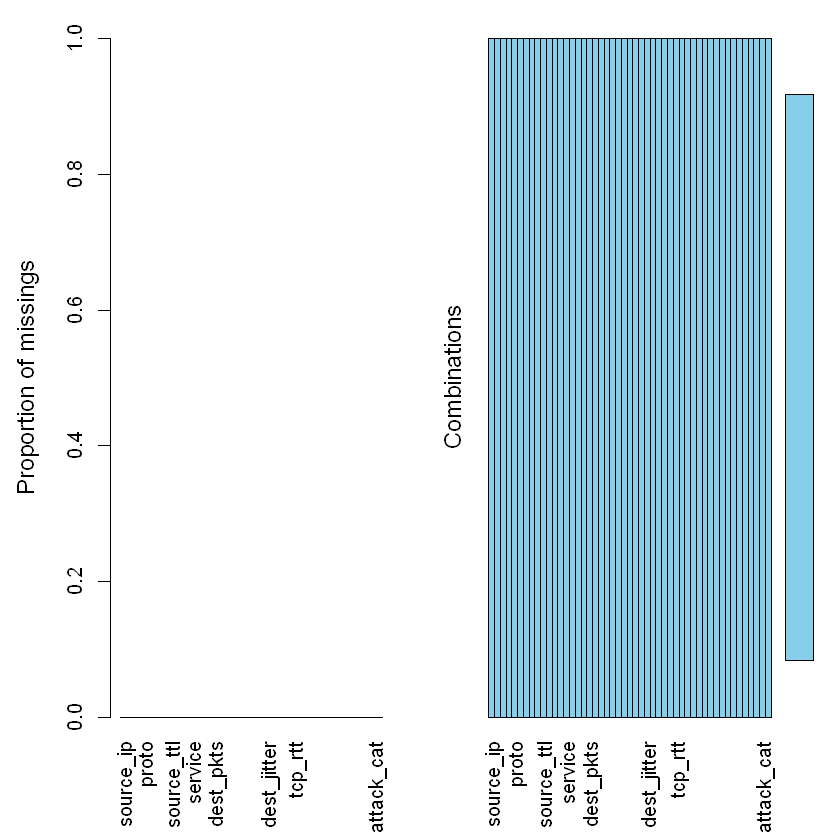

In [7]:
aggr(dff_test) ## Should have no missingess whatsoever 

## 4.1 Neuralnet - A sandbox attempt at NN modelling



In [2]:
# install.packages("neuralnet")
library(neuralnet)

Warning message:
"package 'neuralnet' was built under R version 3.6.3"
Attaching package: 'neuralnet'

The following object is masked from 'package:dplyr':

    compute



In [9]:
set.seed(5)
sandbox <- sample(1:nrow(dff_train), size=nrow(dff_train)*0.03, replace=FALSE)
df_play <- dff_train[sandbox, ]

head(df_play, 3)
dim(df_play)

,source_ip,source_port,dest_ip,dest_port,proto,state,duration,source_bytes,dest_bytes,source_ttl,...,count_ftp_cmd,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,attack_cat,Label
110443,149.171.126.18,47439,175.45.176.1,53,udp,INT,0.000004,264,0,60,...,0,21,21,21,21,21,11,21,,0
1591503,59.166.0.8,12997,149.171.126.9,143,tcp,FIN,0.597719,7810,15446,31,...,0,1,4,6,2,1,1,1,,0
701305,59.166.0.8,45448,149.171.126.5,6500,udp,CON,0.001836,528,304,31,...,0,18,7,4,5,1,1,3,,0


[1] 60961    49

In [10]:
unique(df_play$attack_cat)

[1]                  Generic          Exploits         DoS             
 [5]  Fuzzers          Reconnaissance   Shellcode       Analysis        
 [9] Backdoor          Fuzzers         Worms            Reconnaissance  
[13] Backdoors        Shellcode       
14 Levels:   Fuzzers  Fuzzers   Reconnaissance   Shellcode  ... Worms

In [11]:
set.seed(5)
training <- sample(1:nrow(df_play), size=nrow(df_play)*2/3, replace=FALSE)

In [12]:
df_sandbox <- data.frame(nrow=nrow(df_play))
for(i in 1:ncol(df_play)) {
    if(class(df_play[,i])=='numeric' | class(df_play[,i])=="integer") {
        df_sandbox <- cbind(df_sandbox, df_play[,i])
    }
}

In [13]:
df_sandbox <- df_sandbox[, -1]
colnames(df_sandbox) <- c(paste0("Feature", c(1:ncol(df_sandbox))))

In [14]:
head(df_sandbox, 3)
str(df_sandbox)

Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,Feature41
0.000004,264,0,60,0,0,0,264000000.0,0.0,2,...,0,0,21,21,21,21,21,11,21,0
0.597719,7810,15446,31,29,30,32,103674.1,205099.7,122,...,0,0,1,4,6,2,1,1,1,0
0.001836,528,304,31,29,0,0,1725490.1,993464.1,4,...,0,0,18,7,4,5,1,1,3,0


'data.frame':	60961 obs. of  41 variables:
 $ Feature1 : num  0.000004 0.597719 0.001836 0.262825 0.40132 ...
 $ Feature2 : int  264 7810 528 3728 5000 2934 3614 1920 4862 2646 ...
 $ Feature3 : int  0 15446 304 5474 3080 3740 45396 4312 80850 25684 ...
 $ Feature4 : int  60 31 31 31 31 31 31 31 31 31 ...
 $ Feature5 : int  0 29 29 29 29 29 29 29 29 29 ...
 $ Feature6 : int  0 30 0 7 7 11 7 6 7 7 ...
 $ Feature7 : int  0 32 0 7 7 15 24 6 36 15 ...
 $ Feature8 : num  2.64e+08 1.04e+05 1.73e+06 1.10e+05 9.61e+04 ...
 $ Feature9 : num  0 205100 993464 159680 59364 ...
 $ Feature10: int  2 122 4 32 28 52 60 22 84 42 ...
 $ Feature11: int  0 126 4 24 30 54 62 24 86 44 ...
 $ Feature12: int  0 255 0 255 255 255 255 255 255 255 ...
 $ Feature13: int  0 255 0 255 255 255 255 255 255 255 ...
 $ Feature14: num  0.00 3.69e+09 0.00 3.78e+09 1.17e+09 ...
 $ Feature15: num  0.00 1.55e+09 0.00 1.64e+09 1.23e+09 ...
 $ Feature16: int  132 64 132 117 179 56 60 87 58 63 ...
 $ Feature17: int  0 123 76 2

In [15]:
df_sandbox <- cbind(df_sandbox, attacks = df_play$attack_cat)

In [16]:
head(df_sandbox, 3)

Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,Feature41,attacks
0.000004,264,0,60,0,0,0,264000000.0,0.0,2,...,0,21,21,21,21,21,11,21,0,
0.597719,7810,15446,31,29,30,32,103674.1,205099.7,122,...,0,1,4,6,2,1,1,1,0,
0.001836,528,304,31,29,0,0,1725490.1,993464.1,4,...,0,18,7,4,5,1,1,3,0,


In [17]:
df_play_train <- df_sandbox[training, ]
df_play_test <- df_sandbox[-training, ]

In [18]:
y<- df_play_train$attacks
y<- as.matrix(y)

**On a single hidden layer with 5 nodes**

In [49]:
nn2 <- neuralnet(y~Feature1+Feature2+Feature3+Feature4+Feature5+Feature6+Feature7+Feature8+Feature9+Feature10
               +Feature11+Feature12+Feature13+Feature14+Feature15+Feature16+Feature17+Feature18+Feature19
               +Feature20+Feature21+Feature22+Feature23+Feature24+Feature25+Feature26+Feature27+Feature28+Feature29
               +Feature30+Feature31+Feature32+Feature33+Feature34+Feature35+Feature36+Feature37+Feature38
               +Feature39+Feature40+Feature41, data=df_play_train, hidden = 5, linear.output=F)       

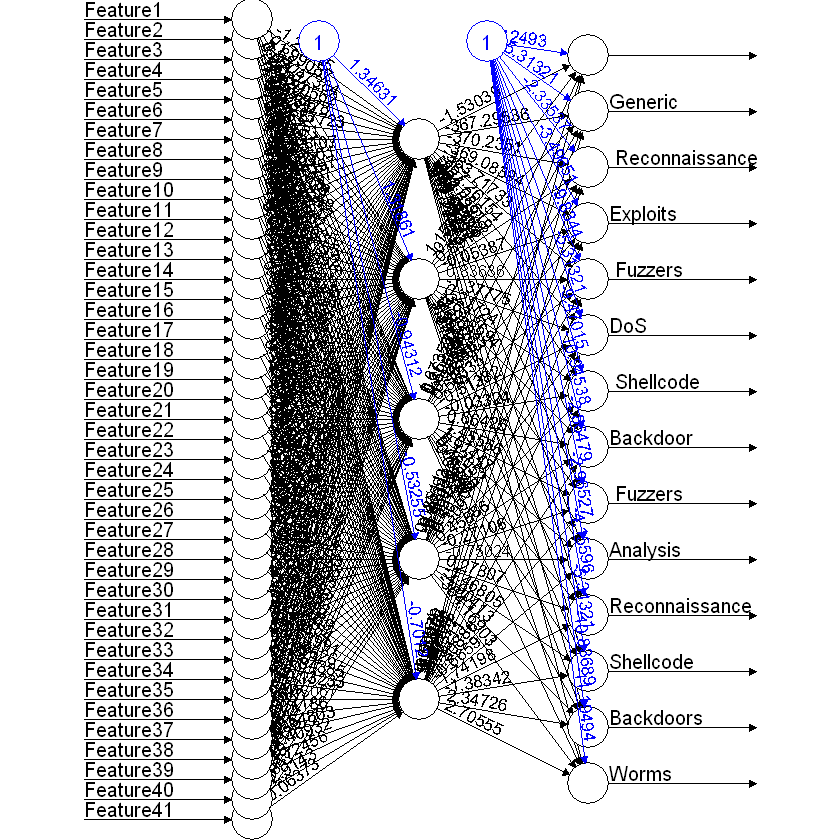

In [50]:
plot(nn2, rep = 1)

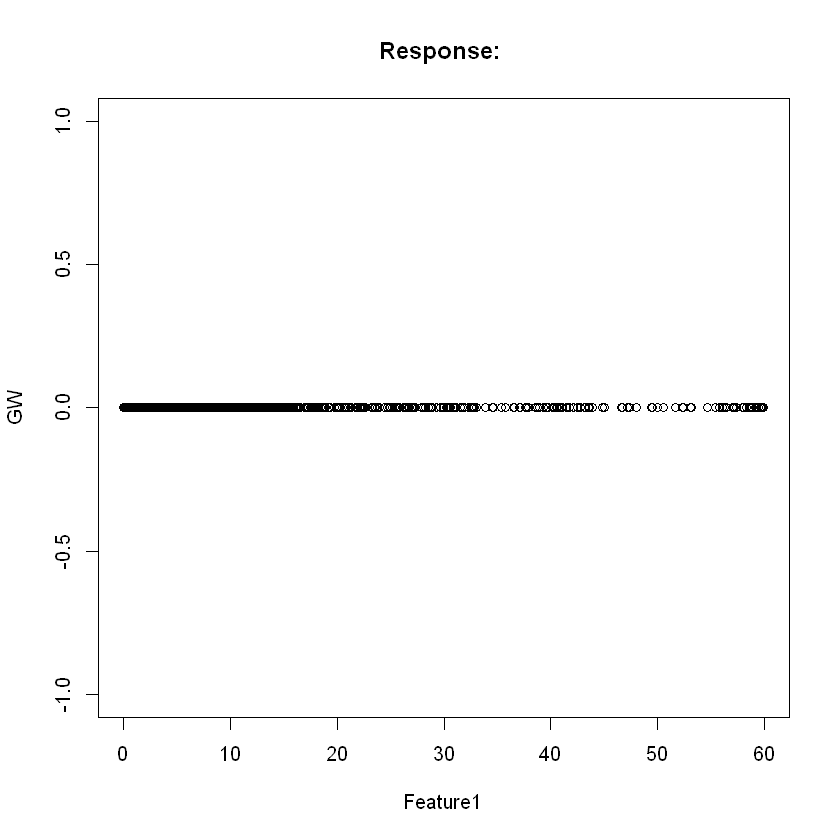

In [51]:
gwplot(nn2, rep='best')

In [52]:
head(nn2$result.matrix,10)

error,4.596804e+03
reached.threshold,9.995841e-03
steps,2.116000e+04
Intercept.to.1layhid1,1.346311e+00
Feature1.to.1layhid1,-1.269454e+00
Feature2.to.1layhid1,1.990873e+00
Feature3.to.1layhid1,-1.473841e+00
Feature4.to.1layhid1,7.056186e-01
Feature5.to.1layhid1,1.547800e+00
Feature6.to.1layhid1,-1.577234e+00


In [53]:
pred2 <- predict(nn2, df_play_test)
class(pred2)

[1] "matrix"

In [54]:
tabb2 <- table(df_play_test$attacks, apply(pred2, 1, which.max))
tabb2

table(df_play_test$attacks)

                  
                       1    11
                   17776     0
   Fuzzers            33     0
   Fuzzers           141     1
   Reconnaissance     94     0
   Shellcode          15     0
  Analysis            14     0
  Backdoor             8     0
  Backdoors            4     0
  DoS                152     0
  Exploits           350     0
  Generic           1714     0
  Reconnaissance      14     0
  Shellcode            3     0
  Worms                2     0


                          Fuzzers         Fuzzers   Reconnaissance  
           17776               33              142               94 
      Shellcode          Analysis         Backdoor        Backdoors 
              15               14                8                4 
             DoS         Exploits          Generic   Reconnaissance 
             152              350             1714               14 
       Shellcode            Worms 
               3                2 

In [55]:
tab <- tabb2
truth <- table(df_play_test$attacks)

In [58]:
acc()

[1] "We have 99.9950789823336 accuracy"


**On a slightly more complex architecture**

In [ ]:
nn = neuralnet(y~Feature1+Feature2+Feature3+Feature4+Feature5+Feature6+Feature7+Feature8+Feature9+Feature10
               +Feature11+Feature12+Feature13+Feature14+Feature15+Feature16+Feature17+Feature18+Feature19
               +Feature20+Feature21+Feature22+Feature23+Feature24+Feature25+Feature26+Feature27+Feature28+Feature29
               +Feature30+Feature31+Feature32+Feature33+Feature34+Feature35+Feature36+Feature37+Feature38
               +Feature39+Feature40+Feature41, data=df_play_train, hidden = c(2,2), linear.output=F) 

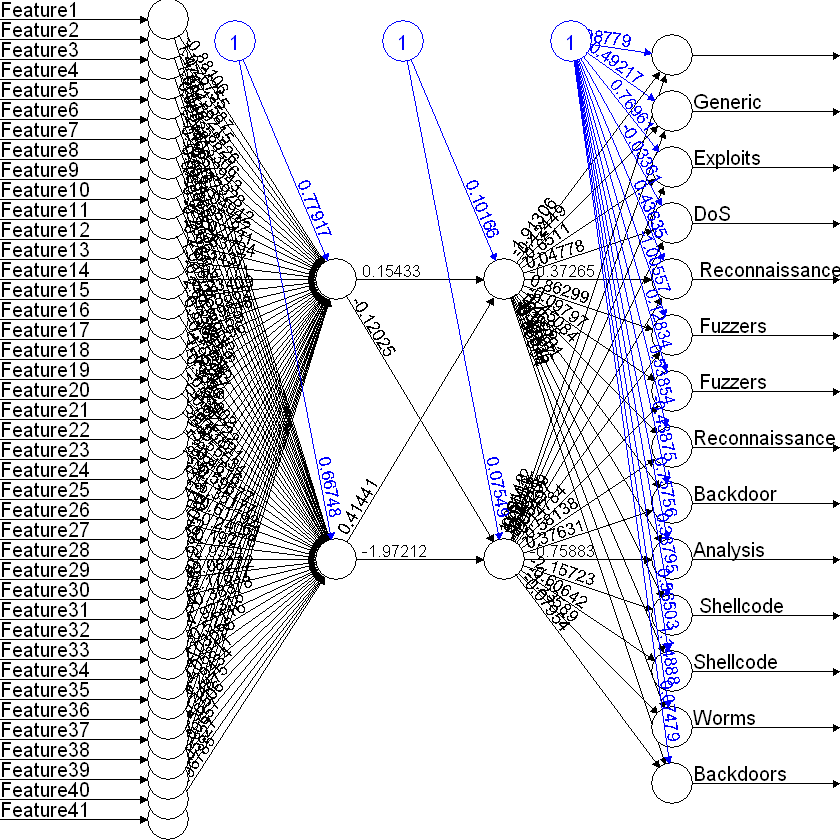

In [19]:
plot(nn, rep="best")

In [20]:
head(nn$result.matrix,10)

error,4.502240e+03
reached.threshold,9.571904e-03
steps,1.060200e+04
Intercept.to.1layhid1,7.791678e-01
Feature1.to.1layhid1,-8.810581e-01
Feature2.to.1layhid1,2.675507e-01
Feature3.to.1layhid1,-1.358748e-01
Feature4.to.1layhid1,3.921517e-01
Feature5.to.1layhid1,-1.588260e+00
Feature6.to.1layhid1,1.133058e+00


In [21]:
pred <- predict(nn, df_play_test)
class(pred)

[1] "matrix"

In [26]:
tabb <- table(df_play_test$attacks, apply(pred, 1, which.max))
tabb

                  
                       1
                   17753
   Fuzzers            36
   Fuzzers           134
   Reconnaissance    101
   Shellcode           9
  Analysis            23
  Backdoor             6
  Backdoors            2
  DoS                146
  Exploits           390
  Generic           1703
  Reconnaissance      14
  Shellcode            2
  Worms                2

In [27]:
table(df_play_test$attacks) ## So we have 100% accuracy -- overfitting!


                          Fuzzers         Fuzzers   Reconnaissance  
           17753               36              134              101 
      Shellcode          Analysis         Backdoor        Backdoors 
               9               23                6                2 
             DoS         Exploits          Generic   Reconnaissance 
             146              390             1703               14 
       Shellcode            Worms 
               2                2 

In [28]:
table(df_play_test$attacks == "Reconnaissance", pred[, 1] >0.5)

       
         TRUE
  FALSE 20307
  TRUE     14

In [29]:
temp_test <- subset(df_play_test, select = c(paste0("Feature",c(1:41))))
nn.results <- compute(nn, temp_test)
results <- data.frame(actual = df_play_test$attacks, prediction = nn.results$net.result)
actual <- results$actual
predicted <-results$prediction 

In [31]:
head(results$prediction.1, 50) # The degree of confidence for the predictions

[1] 0.9601530 0.9601530 0.8361455 0.8361455 0.9601530 0.8361455 0.8361455
 [8] 0.9601530 0.8361455 0.8361455 0.8361455 0.9601530 0.8361455 0.9601530
[15] 0.8361455 0.8361455 0.8361455 0.9601530 0.9601530 0.9601530 0.8361455
[22] 0.8361455 0.8361455 0.9601530 0.8361455 0.8361455 0.9601530 0.9601530
[29] 0.8361455 0.9601530 0.8361455 0.9601530 0.8361455 0.8361455 0.9601530
[36] 0.8361455 0.9601530 0.8361455 0.8361455 0.8361455 0.8361455 0.9601530
[43] 0.8361455 0.8361455 0.9601530 0.9601530 0.8361455 0.9601530 0.8361455
[50] 0.8361455

**On a complex 'Turan network' architecture**

In [23]:
nn = neuralnet(y~Feature1+Feature2+Feature3+Feature4+Feature5+Feature6+Feature7+Feature8+Feature9+Feature10
               +Feature11+Feature12+Feature13+Feature14+Feature15+Feature16+Feature17+Feature18+Feature19
               +Feature20+Feature21+Feature22+Feature23+Feature24+Feature25+Feature26+Feature27+Feature28+Feature29
               +Feature30+Feature31+Feature32+Feature33+Feature34+Feature35+Feature36+Feature37+Feature38
               +Feature39+Feature40+Feature41, data=df_play_train, hidden = c(4,3,2,3,4), linear.output=F)               

Warning message in sqrt(r^2 - x.null^2):
"NaNs produced"

ERROR: Error in grid.Call.graphics(C_setviewport, vp, TRUE): non-finite location and/or size for viewport


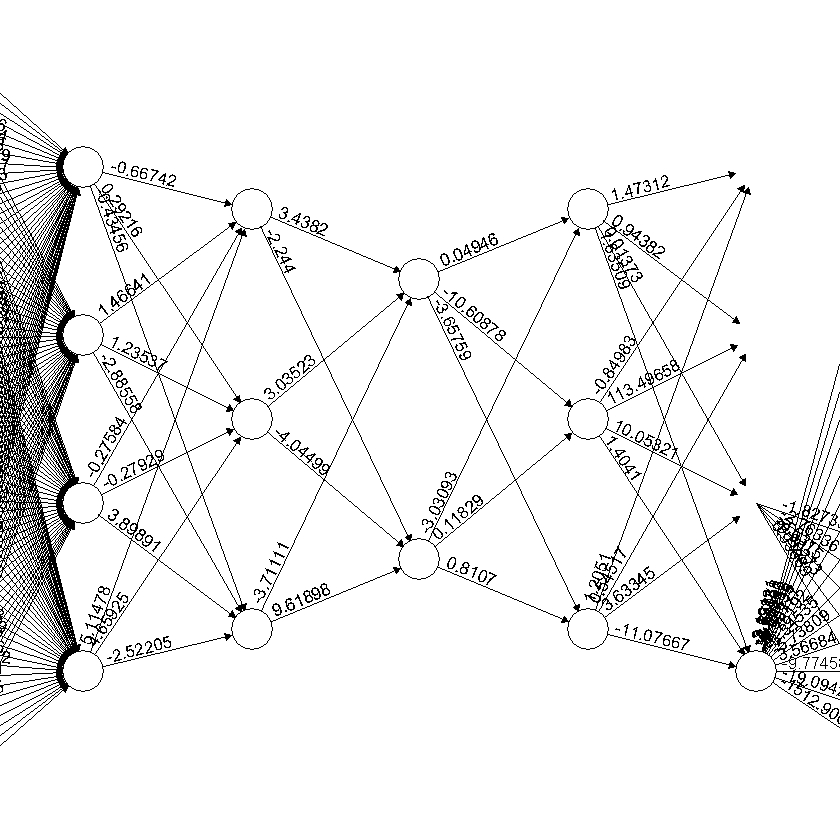

In [25]:
plot(nn, rep="best")

In [27]:
head(nn$result.matrix,10)

error,4.241661e+03
reached.threshold,9.581163e-03
steps,1.631900e+04
Intercept.to.1layhid1,-6.410331e-01
Feature1.to.1layhid1,1.603399e+00
Feature2.to.1layhid1,3.063001e-01
Feature3.to.1layhid1,5.725743e-01
Feature4.to.1layhid1,1.307697e+00
Feature5.to.1layhid1,-2.884456e+00
Feature6.to.1layhid1,-1.243440e-01


In [28]:
pred_n <- predict(nn, df_play_test)
class(pred_n)

[1] "matrix"

In [29]:
tabb_n <- table(df_play_test$attacks, apply(pred_n, 1, which.max))
tabb_n

                  
                       1
                   17776
   Fuzzers            33
   Fuzzers           142
   Reconnaissance     94
   Shellcode          15
  Analysis            14
  Backdoor             8
  Backdoors            4
  DoS                152
  Exploits           350
  Generic           1714
  Reconnaissance      14
  Shellcode            3
  Worms                2

In [57]:
acc <- function() {
	if(identical(sum(tab[,1]),sum(truth))==TRUE) 
	{	print("We have 100% accuracy in prediction") }
	if(ncol(tab)==2) {
		c2 <- sum(tab[,2])
		c1 <- sum(tab[,1])
		c <- c1+c2
		p<- paste("We have", (1-(c2/c))*100, "accuracy", sep = " ")
		print(p) }
	}

In [38]:
tab <- tabb_n
truth <- table(df_play_test$attacks)

In [48]:
acc()

[1] "We have 100% accuracy in prediction"


## 4.2  Neuralnet - Using the whole dataset

In [49]:
## Let's increase the size and test performance then:

set.seed(5)
sandbox <- sample(1:nrow(dff_train), size=nrow(dff_train)*0.1, replace=FALSE)
df_play <- dff_train[sandbox, ]

head(df_play, 3)
dim(df_play)

,source_ip,source_port,dest_ip,dest_port,proto,state,duration,source_bytes,dest_bytes,source_ttl,...,count_ftp_cmd,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,attack_cat,Label
110443,149.171.126.18,47439,175.45.176.1,53,udp,INT,0.000004,264,0,60,...,0,21,21,21,21,21,11,21,,0
1591503,59.166.0.8,12997,149.171.126.9,143,tcp,FIN,0.597719,7810,15446,31,...,0,1,4,6,2,1,1,1,,0
701305,59.166.0.8,45448,149.171.126.5,6500,udp,CON,0.001836,528,304,31,...,0,18,7,4,5,1,1,3,,0


[1] 203203     49

In [50]:
set.seed(5)
training <- sample(1:nrow(df_play), size=nrow(df_play)*9/10, replace=FALSE)

In [51]:
df_sandbox <- data.frame(nrow=nrow(df_play))
for(i in 1:ncol(df_play)) {
    if(class(df_play[,i])=='numeric' | class(df_play[,i])=="integer") {
        df_sandbox <- cbind(df_sandbox, df_play[,i])
    }
}

df_sandbox <- df_sandbox[, -1]
colnames(df_sandbox) <- c(paste0("Feature", c(1:ncol(df_sandbox))))

In [52]:
head(df_sandbox, 3)
str(df_sandbox)

Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39,Feature40,Feature41
0.000004,264,0,60,0,0,0,264000000.0,0.0,2,...,0,0,21,21,21,21,21,11,21,0
0.597719,7810,15446,31,29,30,32,103674.1,205099.7,122,...,0,0,1,4,6,2,1,1,1,0
0.001836,528,304,31,29,0,0,1725490.1,993464.1,4,...,0,0,18,7,4,5,1,1,3,0


'data.frame':	203203 obs. of  41 variables:
 $ Feature1 : num  0.000004 0.597719 0.001836 0.262825 0.40132 ...
 $ Feature2 : int  264 7810 528 3728 5000 2934 3614 1920 4862 2646 ...
 $ Feature3 : int  0 15446 304 5474 3080 3740 45396 4312 80850 25684 ...
 $ Feature4 : int  60 31 31 31 31 31 31 31 31 31 ...
 $ Feature5 : int  0 29 29 29 29 29 29 29 29 29 ...
 $ Feature6 : int  0 30 0 7 7 11 7 6 7 7 ...
 $ Feature7 : int  0 32 0 7 7 15 24 6 36 15 ...
 $ Feature8 : num  2.64e+08 1.04e+05 1.73e+06 1.10e+05 9.61e+04 ...
 $ Feature9 : num  0 205100 993464 159680 59364 ...
 $ Feature10: int  2 122 4 32 28 52 60 22 84 42 ...
 $ Feature11: int  0 126 4 24 30 54 62 24 86 44 ...
 $ Feature12: int  0 255 0 255 255 255 255 255 255 255 ...
 $ Feature13: int  0 255 0 255 255 255 255 255 255 255 ...
 $ Feature14: num  0.00 3.69e+09 0.00 3.78e+09 1.17e+09 ...
 $ Feature15: num  0.00 1.55e+09 0.00 1.64e+09 1.23e+09 ...
 $ Feature16: int  132 64 132 117 179 56 60 87 58 63 ...
 $ Feature17: int  0 123 76 

In [53]:
df_sandbox <- cbind(df_sandbox, attacks = df_play$attack_cat)

df_play_train <- df_sandbox[training, ]
df_play_test <- df_sandbox[-training, ]

y<- df_play_train$attacks
y<- as.matrix(y)

In [ ]:
nn_larger = neuralnet(y~Feature1+Feature2+Feature3+Feature4+Feature5+Feature6+Feature7+Feature8+Feature9+Feature10
               +Feature11+Feature12+Feature13+Feature14+Feature15+Feature16+Feature17+Feature18+Feature19
               +Feature20+Feature21+Feature22+Feature23+Feature24+Feature25+Feature26+Feature27+Feature28+Feature29
               +Feature30+Feature31+Feature32+Feature33+Feature34+Feature35+Feature36+Feature37+Feature38
               +Feature39+Feature40+Feature41, data=df_play_train, hidden = c(4,2), linear.output = F)   

In [57]:
pred_l <- predict(nn_larger, df_play_test)
table(df_play_test$attacks, apply(pred_l, 1, which.max))

ERROR: Error in cbind(1, pred) %*% weights[[num_hidden_layers + 1]]: requires numeric/complex matrix/vector arguments
